<a href="https://colab.research.google.com/github/luqyz/ML/blob/main/Machine_Learning_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Make a prediction with weights
def predict(row, weights):
  activation = weights[0]
  for i in range(len(row)-1):
    activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

In [ ]:
# Example of making predictions
# Make a prediction with weights
def predict(row, weights):
  activation = weights[0]
  for i in range(len(row)-1):
   activation += weights[i + 1] * row[i]
  return 1.0 if activation >= 0.0 else 0.0
# test predictions
dataset = [[2.7810836,2.550537003,0],
[1.465489372,2.362125076,0],
[3.396561688,4.400293529,0],
[1.38807019,1.850220317,0],
[3.06407232,3.005305973,0],
[7.627531214,2.759262235,1],
[5.332441248,2.088626775,1],
[6.922596716,1.77106367,1],
[8.675418651,-0.242068655,1],
[7.673756466,3.508563011,1]]
weights = [-0.1, 0.20653640140000007, -0.23418117710000003]
for row in dataset:
  prediction = predict(row, weights)
  print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1


In [ ]:
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
  weights = [0.0 for i in range(len(train[0]))]
  for epoch in range(n_epoch):
    sum_error = 0.0
    for row in train:
       prediction = predict(row, weights)
       error = row[-1] - prediction
       sum_error += error**2
       weights[0] = weights[0] + l_rate * error
       for i in range(len(row)-1):
         weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
       print( '>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return weights

In [ ]:
# Example of training weights
# Make a prediction with weights
def predict(row, weights):
  activation = weights[0]
  for i in range(len(row)-1):
    activation += weights[i + 1] * row[i]
  return 1.0 if activation >= 0.0 else 0.0

# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
  weights = [0.0 for i in range(len(train[0]))]
  for epoch in range(n_epoch):
    sum_error = 0.0
    for row in train:
      prediction = predict(row, weights)
      error = row[-1] - prediction
      sum_error += error**2
      weights[0] = weights[0] + l_rate * error
      for i in range(len(row)-1):
        weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
    print( '>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
  return weights

# Calculate weights
dataset = [[2.7810836,2.550537003,0],
  [1.465489372,2.362125076,0],
  [3.396561688,4.400293529,0],
  [1.38807019,1.850220317,0],
  [3.06407232,3.005305973,0],
  [7.627531214,2.759262235,1],
  [5.332441248,2.088626775,1],
  [6.922596716,1.77106367,1],
  [8.675418651,-0.242068655,1],
  [7.673756466,3.508563011,1]]
l_rate = 0.1
n_epoch = 5
weights = train_weights(dataset, l_rate, n_epoch)
print(weights)

>epoch=0, lrate=0.100, error=2.000
>epoch=1, lrate=0.100, error=1.000
>epoch=2, lrate=0.100, error=0.000
>epoch=3, lrate=0.100, error=0.000
>epoch=4, lrate=0.100, error=0.000
[-0.1, 0.20653640140000007, -0.23418117710000003]


In [ ]:
# Perceptron Algorithm on the Sonar Dataset
from random import seed
from random import randrange
from csv import reader

# Load a CSV file
def load_csv(filename):
  dataset = list()
  with open(filename, 'r' ) as file:
    csv_reader = reader(file)
    for row in csv_reader:
      if not row:
        continue
      dataset.append(row)
  return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
  for row in dataset:
    row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
  class_values = [row[column] for row in dataset]
  unique = set(class_values)
  lookup = dict()
  for i, value in enumerate(unique):
    lookup[value] = i
  for row in dataset:
    row[column] = lookup[row[column]]
  return lookup

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
  dataset_split = []
  dataset_copy = list(dataset)
  fold_size = int(len(dataset) / n_folds)
  for _ in range(n_folds):
    fold = []
    while len(fold) < fold_size:
      index = randrange(len(dataset_copy))
      fold.append(dataset_copy.pop(index))
    dataset_split.append(fold)
  return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
  correct = 0
  for i in range(len(actual)):
    if actual[i] == predicted[i]:
      correct += 1
  return correct / float(len(actual)) * 100.0

# Update evaluate_algorithm function
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None

        if algorithm.__name__ == 'naive_bayes':
            predicted = algorithm(train_set, test_set)
        elif algorithm.__name__ == 'decision_tree':
            predicted = algorithm(train_set, test_set)
        else:
            predicted = algorithm(train_set, test_set, *args)

        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores




# Make a prediction with weights
def predict(row, weights):
  activation = weights[0]
  for i in range(len(row)-1):
    activation += weights[i + 1] * row[i]
  return 1.0 if activation >= 0.0 else 0.0

# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
  weights = [0.0 for i in range(len(train[0]))]
  for _ in range(n_epoch):
    for row in train:
      prediction = predict(row, weights)
      error = row[-1] - prediction
      weights[0] = weights[0] + l_rate * error
      for i in range(len(row)-1):
        weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
  return weights

# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train, test, l_rate, n_epoch):
  predictions = list()
  weights = train_weights(train, l_rate, n_epoch)
  for row in test:
    prediction = predict(row, weights)
    predictions.append(prediction)
  return(predictions)

# Test the Perceptron algorithm on the sonar dataset
seed(1)

# load and prepare data
filename = 'sonar.all-data.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
  str_column_to_float(dataset, i)
# convert string class to integers
str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 3
l_rate = 0.01
n_epoch = 500
scores = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
print( 'Scores: %s' % scores)
print( 'Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [81.15942028985508, 69.56521739130434, 62.31884057971014]
Mean Accuracy: 71.014%


In [ ]:
import math

# Step activation function (default)
def step_activation(activation):
    return 1.0 if activation >= 0.0 else 0.0

# Sign activation function
def sign_activation(activation):
    return 1.0 if activation >= 0.0 else -1.0

# Sigmoid activation function
def sigmoid_activation(activation):
    return 1.0 / (1.0 + math.exp(-activation))

# Update predict function to use the desired activation function
def predict(row, weights, activation_func=step_activation):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return activation_func(activation)

# Update perceptron function to accept activation function
def perceptron(train, test, l_rate, n_epoch, activation_func):
    predictions = list()
    weights = train_weights(train, l_rate, n_epoch)
    for row in test:
        prediction = predict(row, weights, activation_func)
        predictions.append(round(prediction))
    return predictions

# Test the perceptron algorithm with different activation functions
activation_functions = [step_activation, sign_activation, sigmoid_activation]
for activation_func in activation_functions:
    scores = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch, activation_func)
    print('Activation Function:', activation_func.__name__)
    print('Scores:', scores)
    print('Mean Accuracy: %.3f%%' % (sum(scores) / float(len(scores))))


Activation Function: step_activation
Scores: [71.01449275362319, 66.66666666666666, 65.21739130434783]
Mean Accuracy: 67.633%
Activation Function: sign_activation
Scores: [37.68115942028986, 50.72463768115942, 33.33333333333333]
Mean Accuracy: 40.580%
Activation Function: sigmoid_activation
Scores: [69.56521739130434, 71.01449275362319, 78.26086956521739]
Mean Accuracy: 72.947%


#Q3

In [ ]:
learning_rates = [0.001, 0.01, 0.1]
activation_functions = [step_activation, sign_activation, sigmoid_activation]
results = {}

for lr in learning_rates:
    for activation_func in activation_functions:
        scores = evaluate_algorithm(dataset, perceptron, n_folds, lr, n_epoch, activation_func)
        key = (lr, activation_func.__name__)
        results[key] = scores

# Print tabulated results
for key, scores in results.items():
    print(f"Learning Rate: {key[0]}, Activation Function: {key[1]}")
    print("Scores:", scores)
    print("Mean Accuracy: %.3f%%" % (sum(scores) / len(scores)))


Learning Rate: 0.001, Activation Function: step_activation
Scores: [62.31884057971014, 65.21739130434783, 72.46376811594203]
Mean Accuracy: 66.667%
Learning Rate: 0.001, Activation Function: sign_activation
Scores: [47.82608695652174, 49.275362318840585, 36.231884057971016]
Mean Accuracy: 44.444%
Learning Rate: 0.001, Activation Function: sigmoid_activation
Scores: [68.11594202898551, 75.36231884057972, 68.11594202898551]
Mean Accuracy: 70.531%
Learning Rate: 0.01, Activation Function: step_activation
Scores: [69.56521739130434, 69.56521739130434, 78.26086956521739]
Mean Accuracy: 72.464%
Learning Rate: 0.01, Activation Function: sign_activation
Scores: [49.275362318840585, 43.47826086956522, 43.47826086956522]
Mean Accuracy: 45.411%
Learning Rate: 0.01, Activation Function: sigmoid_activation
Scores: [71.01449275362319, 76.81159420289855, 78.26086956521739]
Mean Accuracy: 75.362%
Learning Rate: 0.1, Activation Function: step_activation
Scores: [76.81159420289855, 71.01449275362319, 75

#Q4

n_epoch: 10, Mean Training Error: 0.46522781774580335, Mean Validation Error: 0.45893719806763283
n_epoch: 11, Mean Training Error: 0.4676258992805755, Mean Validation Error: 0.463768115942029
n_epoch: 12, Mean Training Error: 0.46522781774580335, Mean Validation Error: 0.46859903381642515
n_epoch: 13, Mean Training Error: 0.46282973621103113, Mean Validation Error: 0.46859903381642515
n_epoch: 14, Mean Training Error: 0.4628297362110312, Mean Validation Error: 0.4589371980676329
n_epoch: 15, Mean Training Error: 0.46522781774580335, Mean Validation Error: 0.46859903381642515
n_epoch: 16, Mean Training Error: 0.46522781774580335, Mean Validation Error: 0.46859903381642515
n_epoch: 17, Mean Training Error: 0.4676258992805756, Mean Validation Error: 0.463768115942029
n_epoch: 18, Mean Training Error: 0.46522781774580335, Mean Validation Error: 0.46859903381642515
n_epoch: 19, Mean Training Error: 0.46522781774580335, Mean Validation Error: 0.46859903381642515
n_epoch: 20, Mean Training E

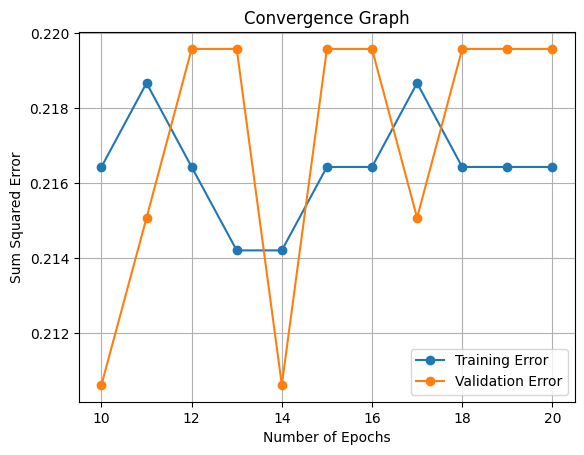

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Tuning the number of epochs
n_epoch_range = range(10, 21)  # Range of epochs from 10 to 20
learning_rate = 0.01  # Assuming a fixed learning rate

train_errors = []
validation_errors = []

for n_epoch in n_epoch_range:
    # Lists to store errors for each fold
    train_errors_fold = []
    validation_errors_fold = []

    # Redefine folds here
    folds = cross_validation_split(dataset, n_folds)

    for fold in folds:
        train_set = list(dataset)
        train_set = [row for row in train_set if row not in fold]  # Remove rows in fold from train_set
        test_set = list(fold)

        # Training
        weights = train_weights(train_set, learning_rate, n_epoch)

        # Calculating errors for train set
        train_error = 0
        for row in train_set:
            prediction = predict(row, weights)
            train_error += (row[-1] - prediction) ** 2
        train_error /= len(train_set)
        train_errors_fold.append(train_error)

        # Calculating errors for test set (validation error)
        validation_error = 0
        for row in test_set:
            prediction = predict(row, weights)
            validation_error += (row[-1] - prediction) ** 2
        validation_error /= len(test_set)
        validation_errors_fold.append(validation_error)

    # Compute mean error across folds for each epoch
    mean_train_error = np.mean(train_errors_fold)
    mean_validation_error = np.mean(validation_errors_fold)

    train_errors.append(mean_train_error)
    validation_errors.append(mean_validation_error)

    # Print the current values of n_epoch and mean error
    print(f"n_epoch: {n_epoch}, Mean Training Error: {mean_train_error}, Mean Validation Error: {mean_validation_error}")

# Plotting the convergence graph
plt.plot(n_epoch_range, [error ** 2 for error in train_errors], label='Training Error', marker='o')
plt.plot(n_epoch_range, [error ** 2 for error in validation_errors], label='Validation Error', marker='o')
plt.title('Convergence Graph')
plt.xlabel('Number of Epochs')
plt.ylabel('Sum Squared Error')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
pip install prettytable


+---------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+----------+----------+----------+---------+
|   Algorithm   |  Run 1  |  Run 2  |  Run 3  |  Run 4  |  Run 5  |  Run 6  |  Run 7  |  Run 8  |  Run 9  |  Run 10 |   Min    |   Max    |   Avg    |   Std   |
+---------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+----------+----------+----------+---------+
|   perceptron  | 0.79710 | 0.59420 | 0.65217 | 0.71014 | 0.66667 | 0.65217 | 0.60870 | 0.60870 | 0.56522 | 0.66667 | 49.27536 | 79.71014 | 68.26087 | 8.34519 |
|  naive_bayes  | 0.63768 | 0.72464 | 0.63768 | 0.62319 | 0.63768 | 0.73913 | 0.65217 | 0.65217 | 0.72464 | 0.68116 | 60.86957 | 75.36232 | 67.63285 | 4.22256 |
| decision_tree | 0.60870 | 0.76812 | 0.71014 | 0.69565 | 0.72464 | 0.79710 | 0.71014 | 0.69565 | 0.72464 | 0.72464 | 60.86957 | 79.71014 | 70.96618 | 3.98631 |
+---------------+---------+-------

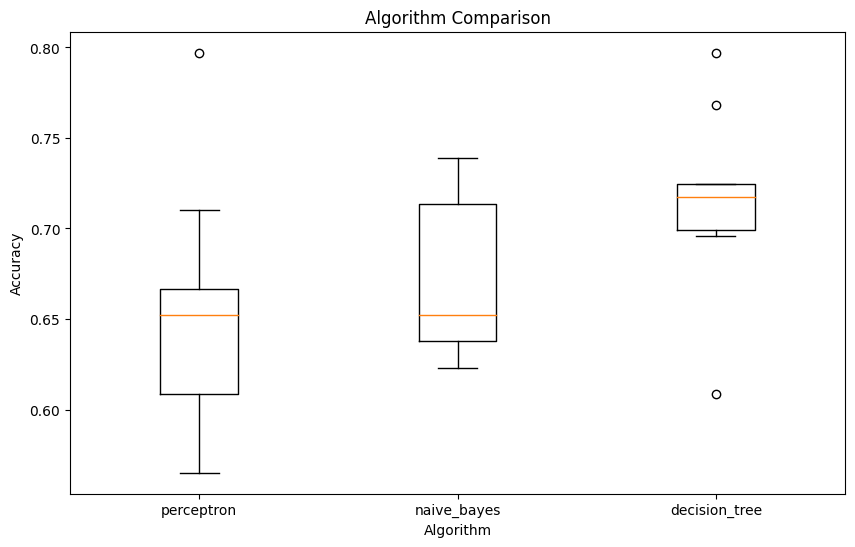

In [ ]:
from prettytable import PrettyTable
import numpy as np

# Importing necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Define a function to evaluate Naive Bayes algorithm
def naive_bayes(train, test):
    train_X = [row[:-1] for row in train]
    train_y = [row[-1] for row in train]
    test_X = [row[:-1] for row in test]
    test_y = [row[-1] for row in test]
    model = GaussianNB()
    model.fit(train_X, train_y)
    predictions = model.predict(test_X)
    return predictions

# Define a function to evaluate Decision Tree algorithm
def decision_tree(train, test):
    train_X = [row[:-1] for row in train]
    train_y = [row[-1] for row in train]
    test_X = [row[:-1] for row in test]
    test_y = [row[-1] for row in test]
    model = DecisionTreeClassifier()
    model.fit(train_X, train_y)
    predictions = model.predict(test_X)
    return predictions

# Add Naive Bayes and Decision Tree to the list of algorithms
algorithms = [perceptron, naive_bayes, decision_tree]

# Run evaluation for each algorithm 10 times
results = {}
for algorithm in algorithms:
    all_scores = []
    for _ in range(10):
        # Assuming you have a fixed learning rate, you can assign it directly here
        fixed_learning_rate = 0.01
        scores = evaluate_algorithm(dataset, algorithm, n_folds, fixed_learning_rate, n_epoch, activation_func)
        all_scores.extend(scores)
    mean_accuracy = np.mean(all_scores)
    min_accuracy = np.min(all_scores)
    max_accuracy = np.max(all_scores)
    std_accuracy = np.std(all_scores)
    results[algorithm.__name__] = [min_accuracy, max_accuracy, mean_accuracy, std_accuracy] + [score / 100 for score in all_scores]

# Create a PrettyTable instance
table = PrettyTable()

# Add columns
table.field_names = ["Algorithm", "Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Run 6", "Run 7", "Run 8", "Run 9", "Run 10", "Min", "Max", "Avg", "Std"]

# Add data rows
for key, values in results.items():
    table.add_row([key] + ["%.5f" % value for value in values[4:14]] + ["%.5f" % value for value in values[:4]])

# Print the table
print(table)

# Draw a box plot to summarize the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.boxplot([np.array(scores[4:14]) for scores in results.values()], labels=results.keys())
plt.title("Algorithm Comparison")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.show()
